<a href="https://colab.research.google.com/github/Mateus-cpa/pipeline-telegram-aws/blob/main/Profissao_Analista_dedados_M42_Exercicio_parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Pipeline de Dados do Telegram II
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Ingestão;</li>
  <li>ETL;</li>
  <li>Apresentação;</li>
  <li>Storytelling.</li>
</ol>

---

# **Exercícios**

## 1\. Ingestão

Replique as atividades da aula 1.

1.1. Crie um `bucket` no `AWS S3` para o armazenamento de dados crus, não se esqueça de adicionar o sufixo `-raw`.

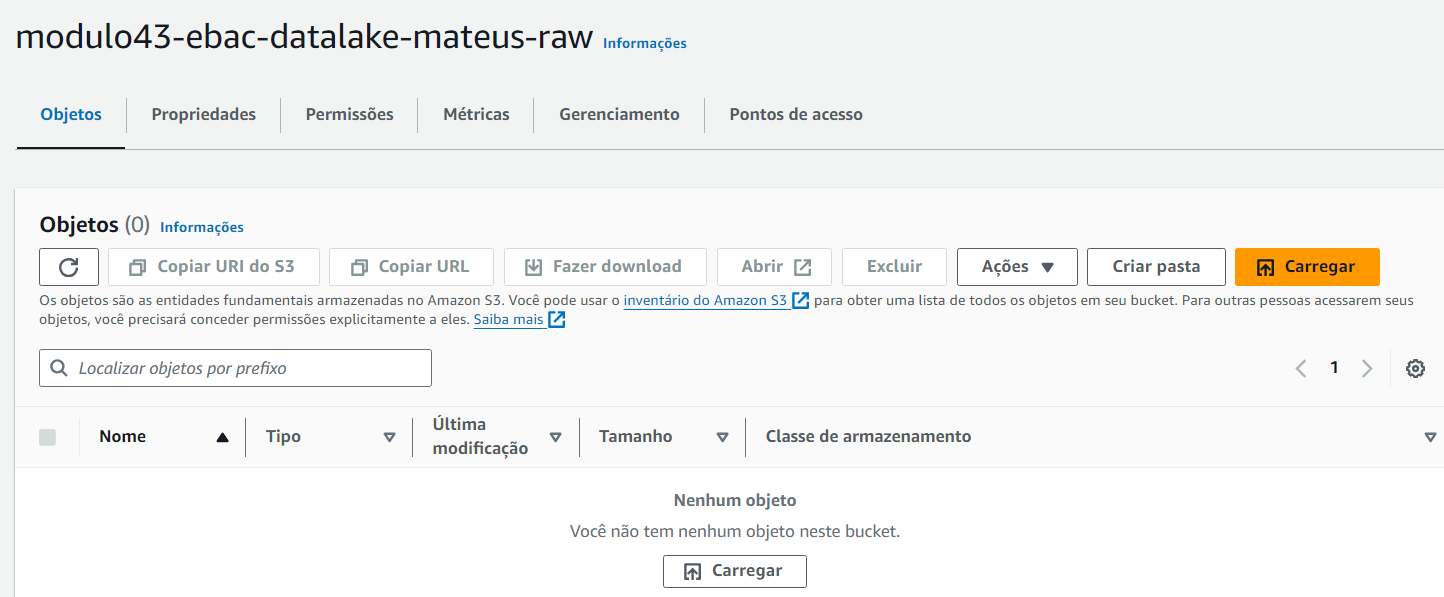

1.2. Crie uma função no `AWS Lambda` para recebimento das mensagens e armazenamento no formato JSON no `bucket` de dados crus. Não se esqueça de configurar as variáveis de ambiente e de adicionar as permissão de interação com `AWS S3` no `AWS IAM`.

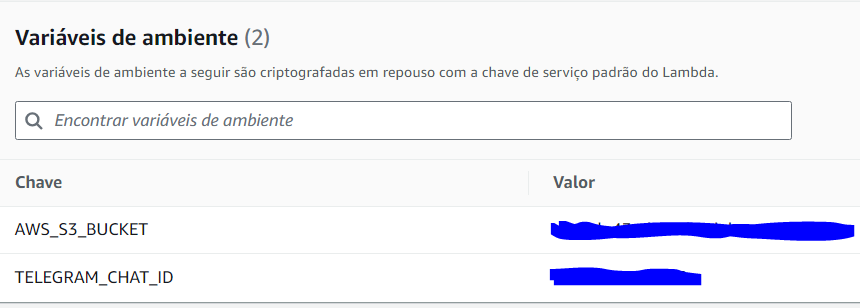

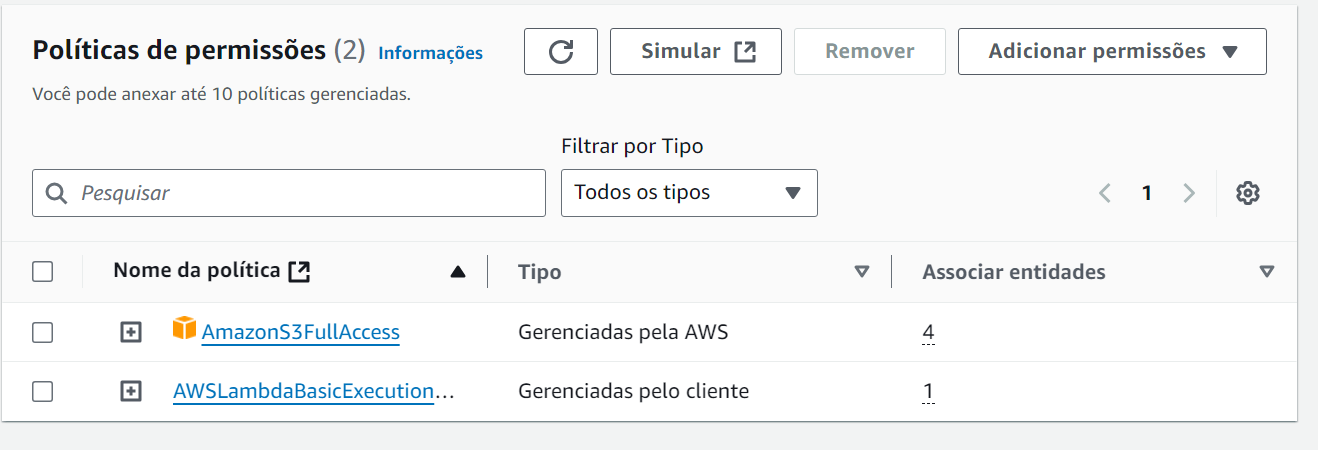

> **Nota**: Para testar a função com evento do próprio `AWS Lambda`, substitua o código `message = json.loads(event["body"])` por `message = event`. Lembre-se que o primeiro só faz sentido na integração com o `AWS API Gateway`.

In [98]:
import json
import requests

#ler arquivos do computador
from google.colab import files
uploaded = files.upload()

#ler dataframe de dictionary
import pandas as pd
apis_df = pd.read_csv('/content/APIs_m43_ebac.csv')


KeyboardInterrupt: 

In [99]:
#ler APIs
AWS_S3_BUCKET = apis_df[' AWS_S3_BUCKET'][0]
TELEGRAM_CHAT_ID = apis_df['TELEGRAM_CHAT_ID'][0]
token = apis_df['telegram_api'][0]
aws_api_gateway_url = apis_df['AWS_API_Gateway'][0]


In [100]:
base_url = f'https://api.telegram.org/bot{token}'

#informações do bot
response = requests.get(url=f'{base_url}/getMe')

print(json.dumps(json.loads(response.text), indent=2))

{
  "ok": true,
  "result": {
    "id": 7670863613,
    "is_bot": true,
    "first_name": "@MrPinheiroBot",
    "username": "Mr_Pinheiro_bot",
    "can_join_groups": false,
    "can_read_all_group_messages": false,
    "supports_inline_queries": false,
    "can_connect_to_business": false,
    "has_main_web_app": false
  }
}


In [87]:
#mensagens captadas pelo bot
response = requests.get(url=f'{base_url}/getUpdates')

print(json.dumps(json.loads(response.text), indent=2))

{
  "ok": true,
  "result": [
    {
      "update_id": 511893921,
      "message": {
        "message_id": 22,
        "from": {
          "id": 393467487,
          "is_bot": false,
          "first_name": "Mateus",
          "last_name": "Pinheiro",
          "username": "Mateuscpa",
          "language_code": "en"
        },
        "chat": {
          "id": -1002315408110,
          "title": "M43_Grupo_teste_captar_mensagens",
          "type": "supergroup"
        },
        "date": 1728760451,
        "text": "e agora? est\u00e1 funcionando?"
      }
    },
    {
      "update_id": 511893922,
      "message": {
        "message_id": 23,
        "from": {
          "id": 393467487,
          "is_bot": false,
          "first_name": "Mateus",
          "last_name": "Pinheiro",
          "username": "Mateuscpa",
          "language_code": "en"
        },
        "chat": {
          "id": -1002315408110,
          "title": "M43_Grupo_teste_captar_mensagens",
          "type": "superg

In [4]:
!pip install boto3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.1/139.1 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 87.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.6/82.6 kB 7.1 MB/s eta 0:00:00


In [ ]:
import os
import json
import logging
from datetime import datetime, timezone, timedelta

import boto3


def lambda_handler(event: dict, context: dict) -> dict:

  '''
  Recebe uma mensagens do Telegram via AWS API Gateway, verifica no
  seu conteúdo se foi produzida em um determinado grupo e a escreve,
  em seu formato original JSON, em um bucket do AWS S3.
  '''

  # vars de ambiente

  BUCKET = AWS_S3_BUCKET
  #TELEGRAM_CHAT_ID = TELEGRAM_CHAT_ID

  # vars lógicas

  tzinfo = timezone(offset=timedelta(hours=-3))
  date = datetime.now(tzinfo).strftime('%Y-%m-%d')
  timestamp = datetime.now(tzinfo).strftime('%Y%m%d%H%M%S%f')

  filename = f'{timestamp}.json'

  # código principal

  client = boto3.client('s3')

  try:

    message = json.dumps(json.loads(response.text), indent=2)
    #message = json.loads(event["body"])
    chat_id = message["message"]["chat"]["id"]

    if chat_id == TELEGRAM_CHAT_ID:

      with open(f"/tmp/{filename}", mode='w', encoding='utf8') as fp:
        json.dump(message, fp)

      client.upload_file(f'/tmp/{filename}', BUCKET, f'telegram/context_date={date}/{filename}')

      except Exception as exc:
      print(logging.error(msg=exc))
      return dict(statusCode="500")

  else:
      return dict(statusCode="200")

#chamar função
lambda_handler(event=None, context=None)

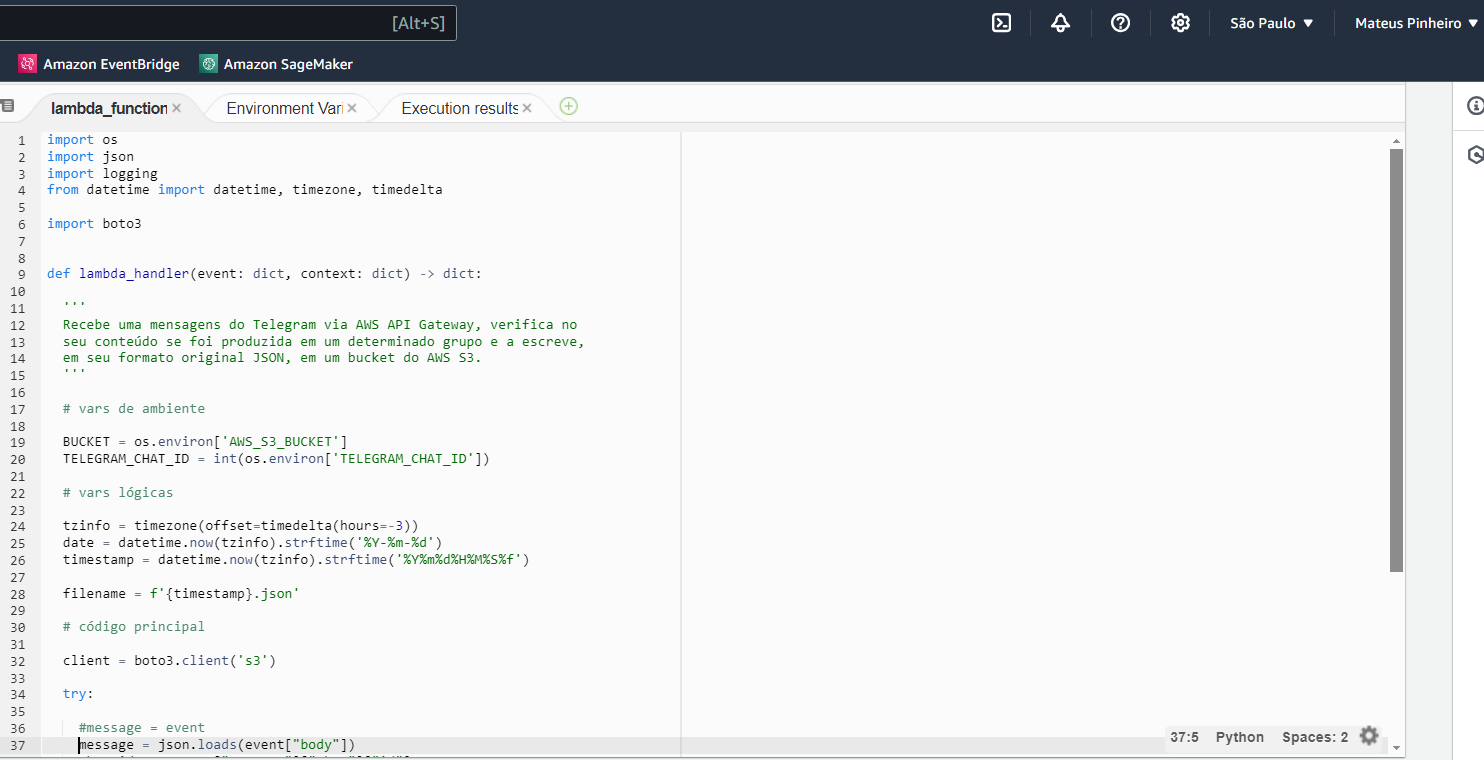

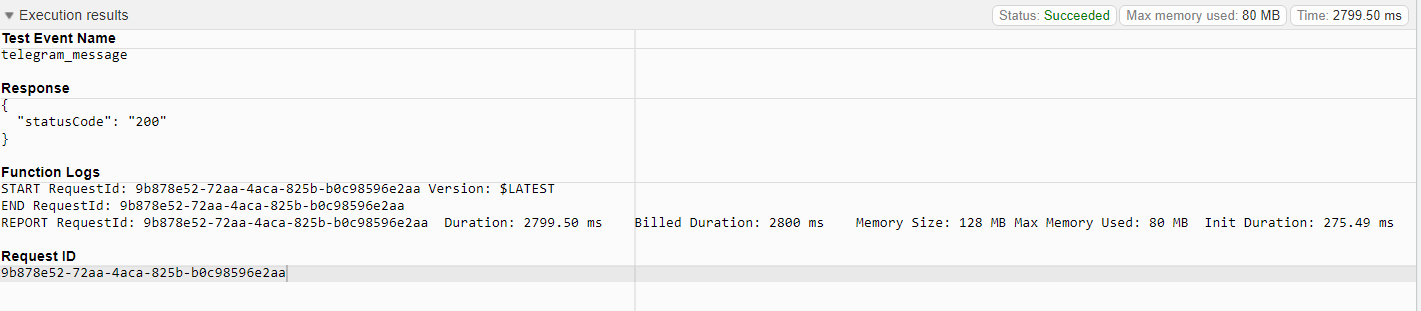

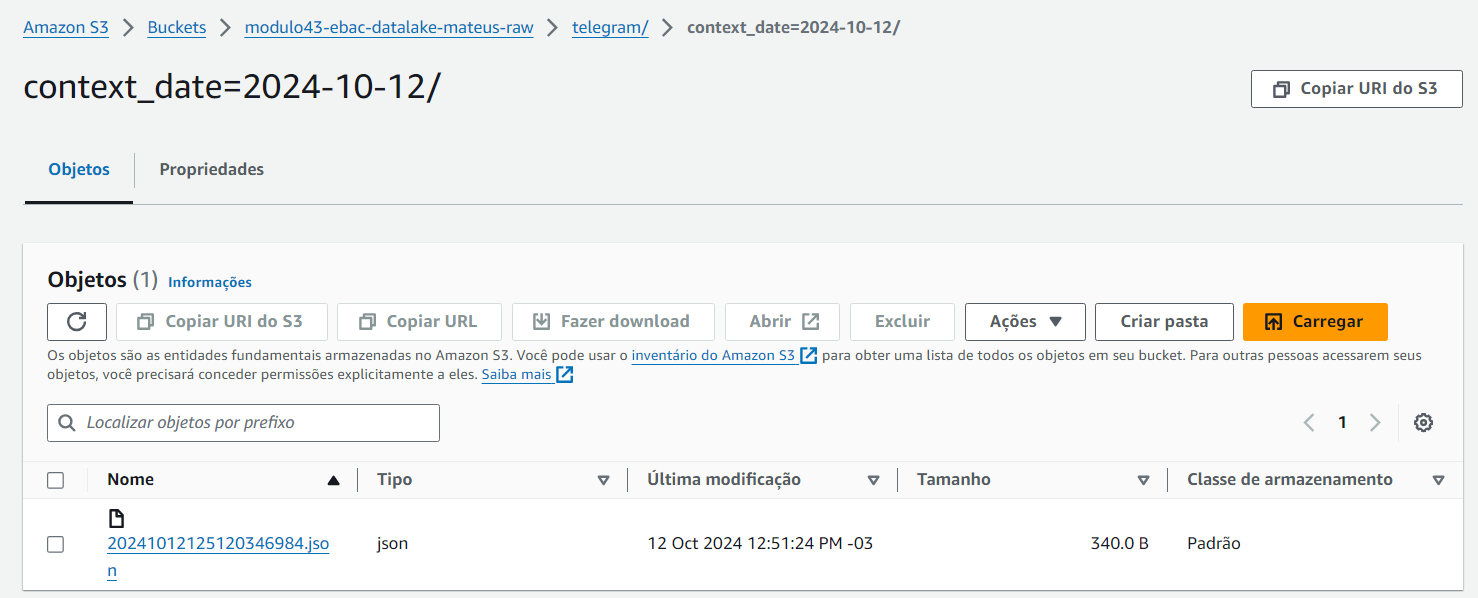

1.3. Crie uma API no `AWS API Gateway` a conecte a função do `AWS Lambda`, conforme apresentado na aula.

> **Nota**: não disponibilize o endereço da API gerada.

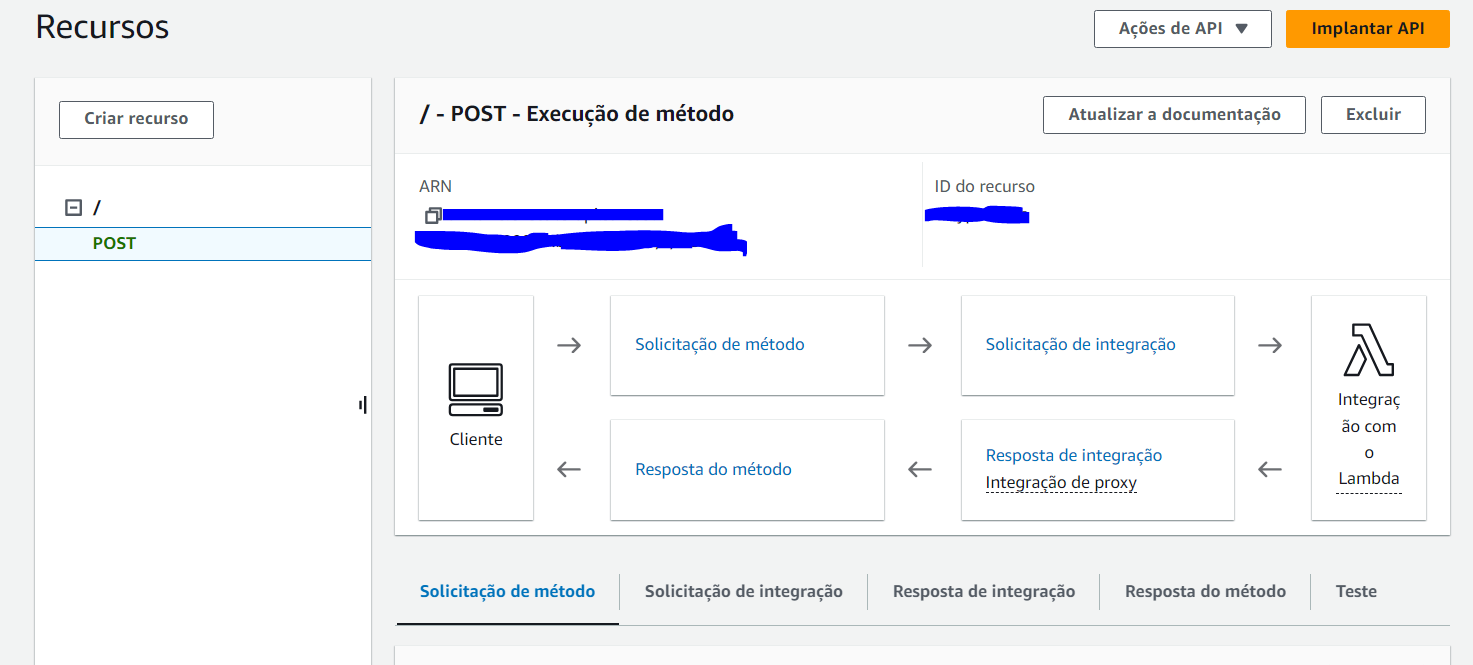

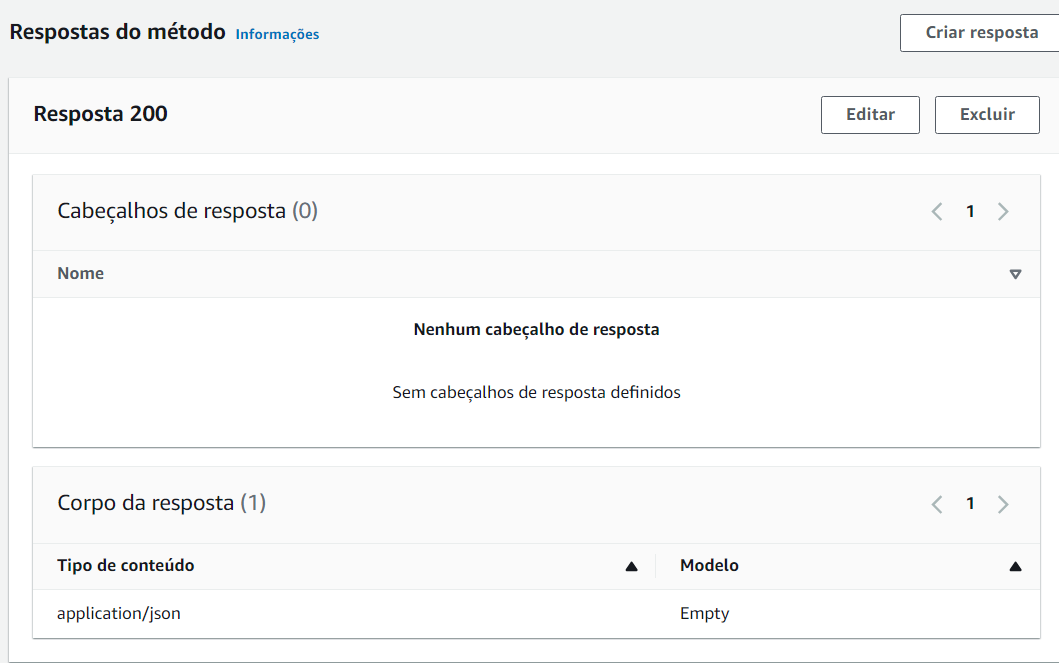

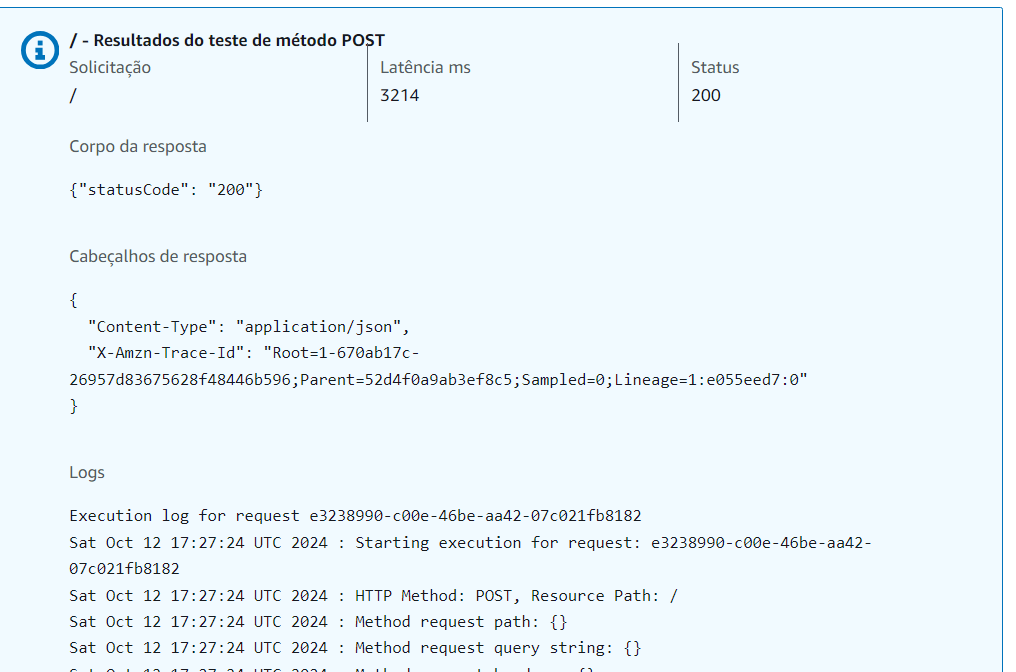

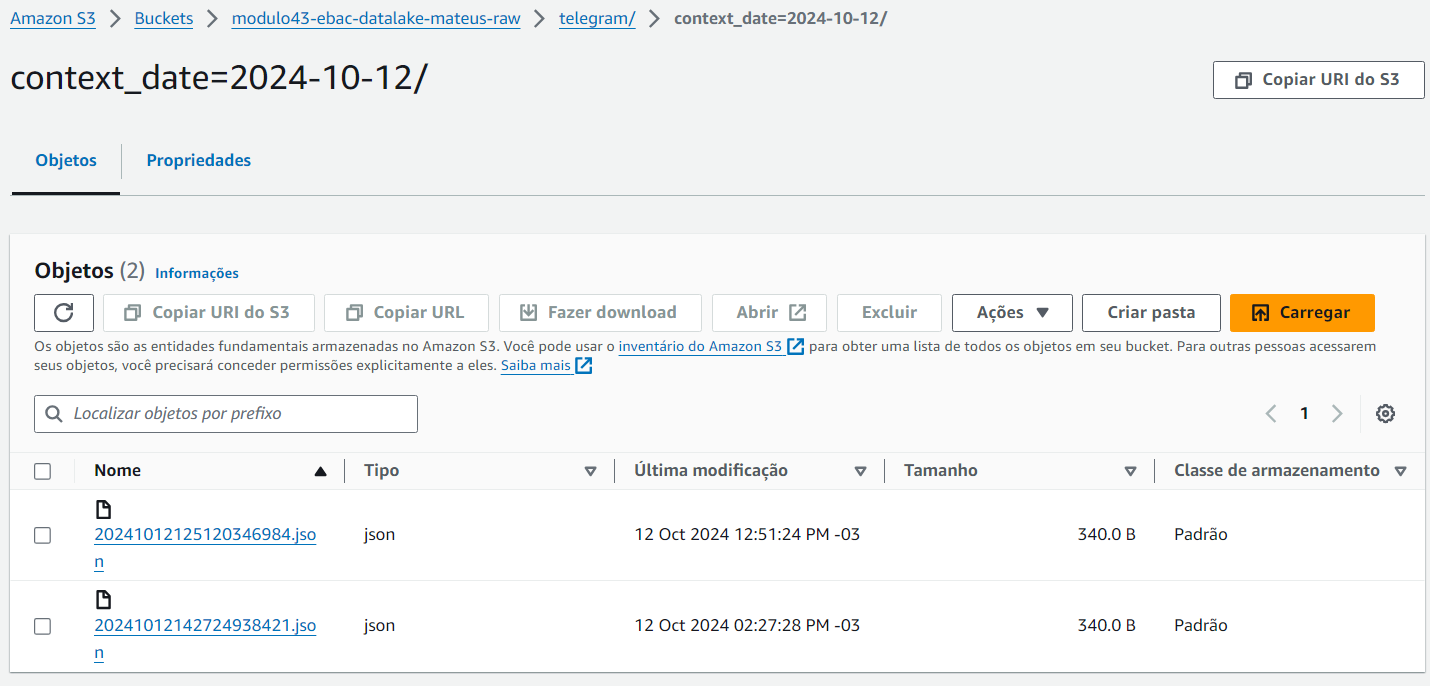

1.4. Configura o *webhook* do *bot* através do método `setWebhook` da API de *bots* do **Telegram**. utilize o endereço da API criada no `AWS API Gateway`. Utilize o método `getWebhookInfo` para consultar a integração.

> **Nota**: não disponibilize o *token* de acesso ao seu *bot* da API de *bots* do **Telegram**.

In [88]:
response = requests.get(url=f'{base_url}/setWebhook?url={aws_api_gateway_url}')

print(json.dumps(json.loads(response.text), indent=2))

{
  "ok": true,
  "result": true,
  "description": "Webhook was set"
}


In [80]:
# ver a informação
response = requests.get(url=f'{base_url}/getWebhookInfo')

print(json.dumps(json.loads(response.text), indent=2))

{
  "ok": true,
  "result": {
    "url": "https://b9buhx3dw2.execute-api.sa-east-1.amazonaws.com/dev",
    "has_custom_certificate": false,
    "pending_update_count": 0,
    "max_connections": 40,
    "ip_address": "54.207.45.19"
  }
}


In [89]:
#testar bloqueio de getUpdates
response = requests.get(url=f'{base_url}/getUpdates')

print(json.dumps(json.loads(response.text), indent=2))

{
  "ok": false,
  "error_code": 409,
  "description": "Conflict: can't use getUpdates method while webhook is active; use deleteWebhook to delete the webhook first"
}


## 2\. ETL

Replique as atividades da aula 2.

2.1. Crie um `bucket` no `AWS S3` para o armazenamento de dados enriquecidos, não se esqueça de adicionar o sufixo `-enriched`.

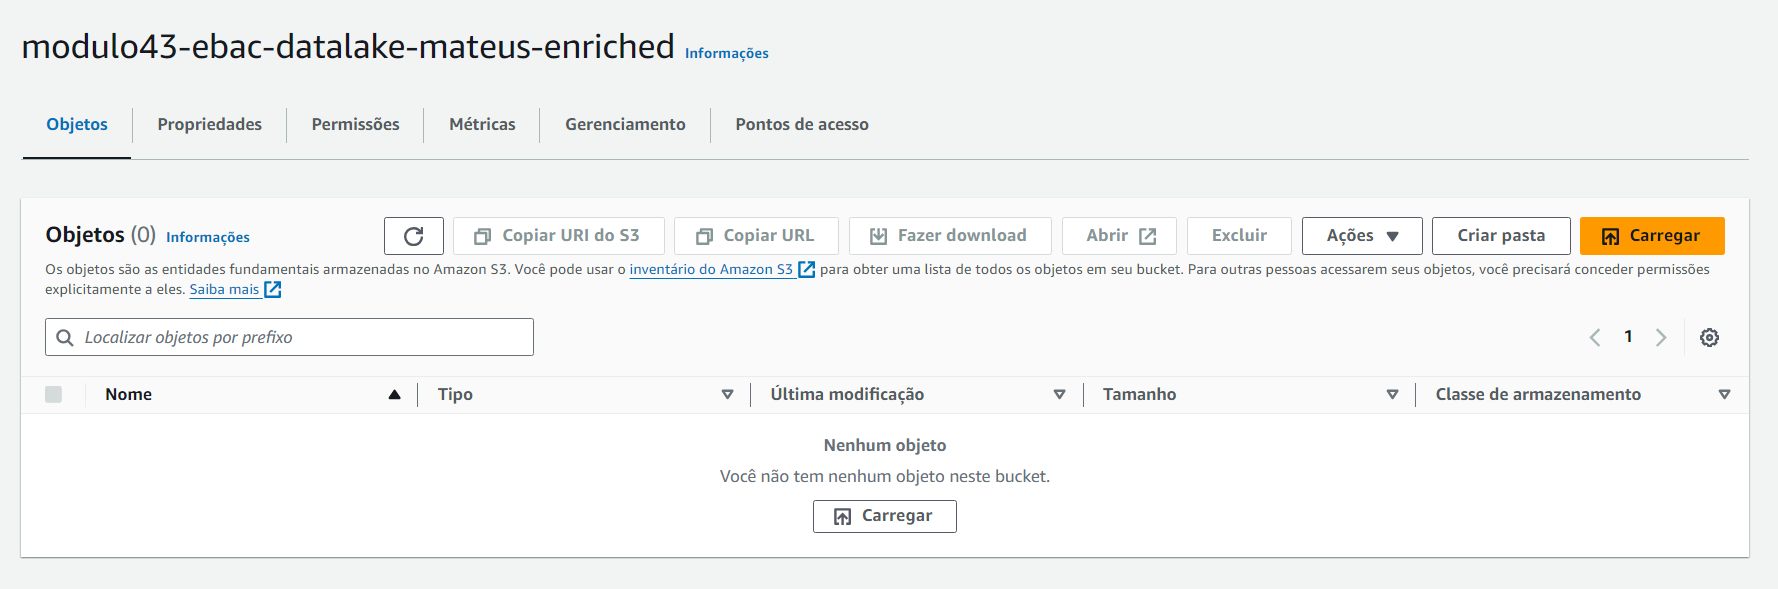

2.2. Cria uma função no `AWS Lambda` para processar as mensagens JSON de uma única partição do dia anterior (D-1), armazenadas no *bucket* de dados crus. Salve o resultado em um único arquivo PARQUET, também particionado por dia. Não se esqueça de configurar as variáveis de ambiente, de adicionar as permissão de interação com `AWS S3` no `AWS IAM`, de configurar o *timeout* e de adicionar a *layer* com o código do pacote Python PyArrow.

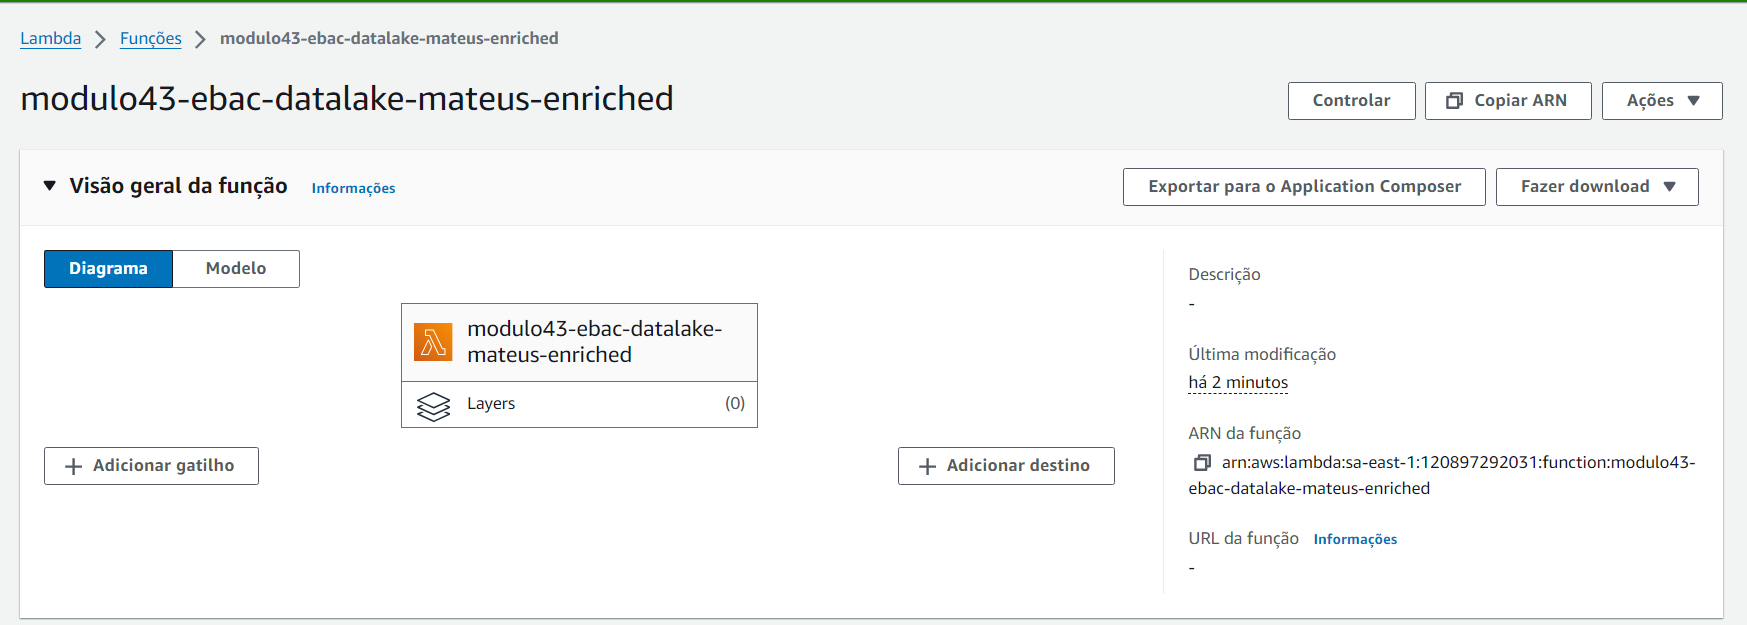

> **Nota**: Para testar a função, substitua o código `date = (datetime.now(tzinfo) - timedelta(days=1)).strftime('%Y-%m-%d')` por `date = (datetime.now(tzinfo) - timedelta(days=0)).strftime('%Y-%m-%d')`, permitindo assim o processamento de mensagens de um mesmo dia.

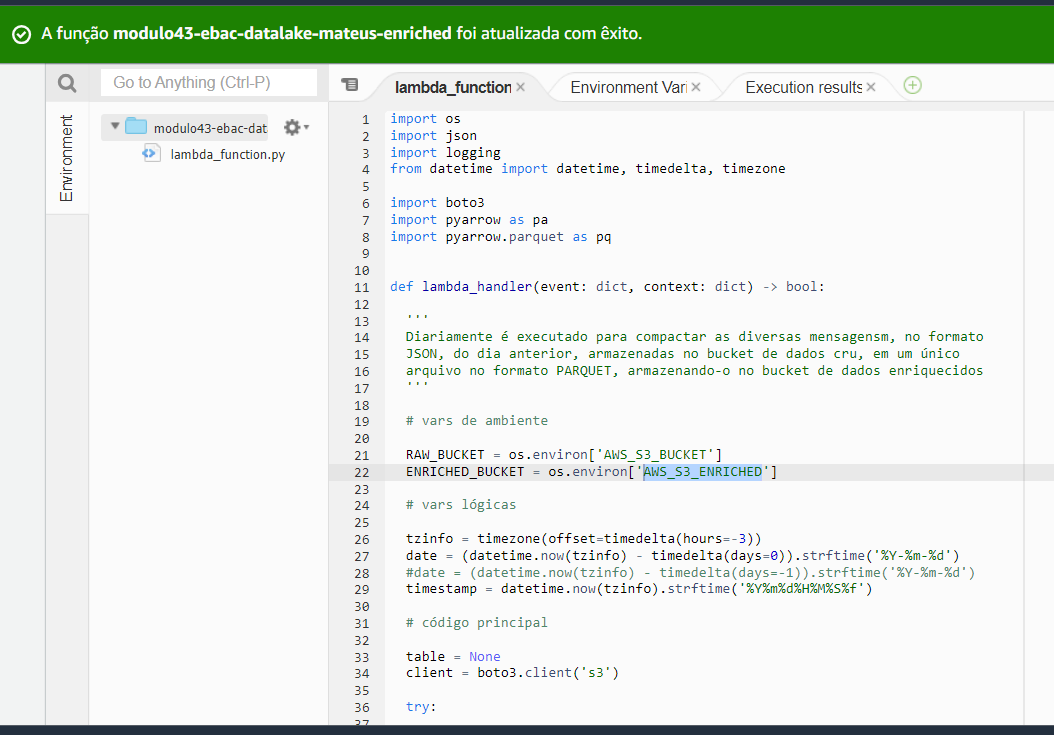

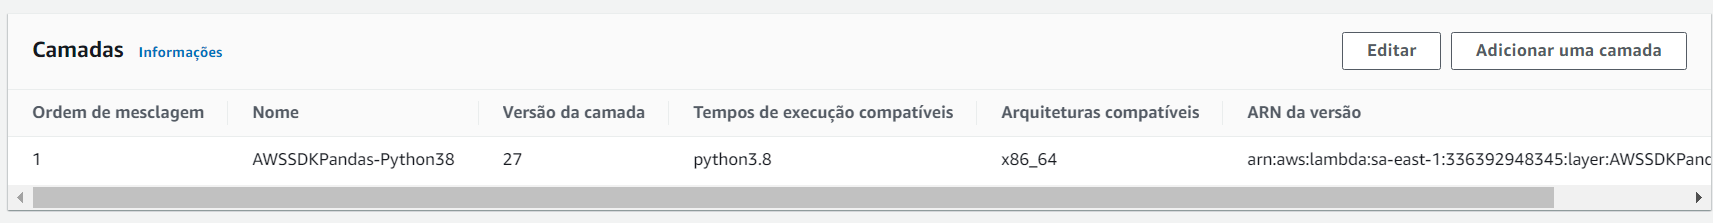

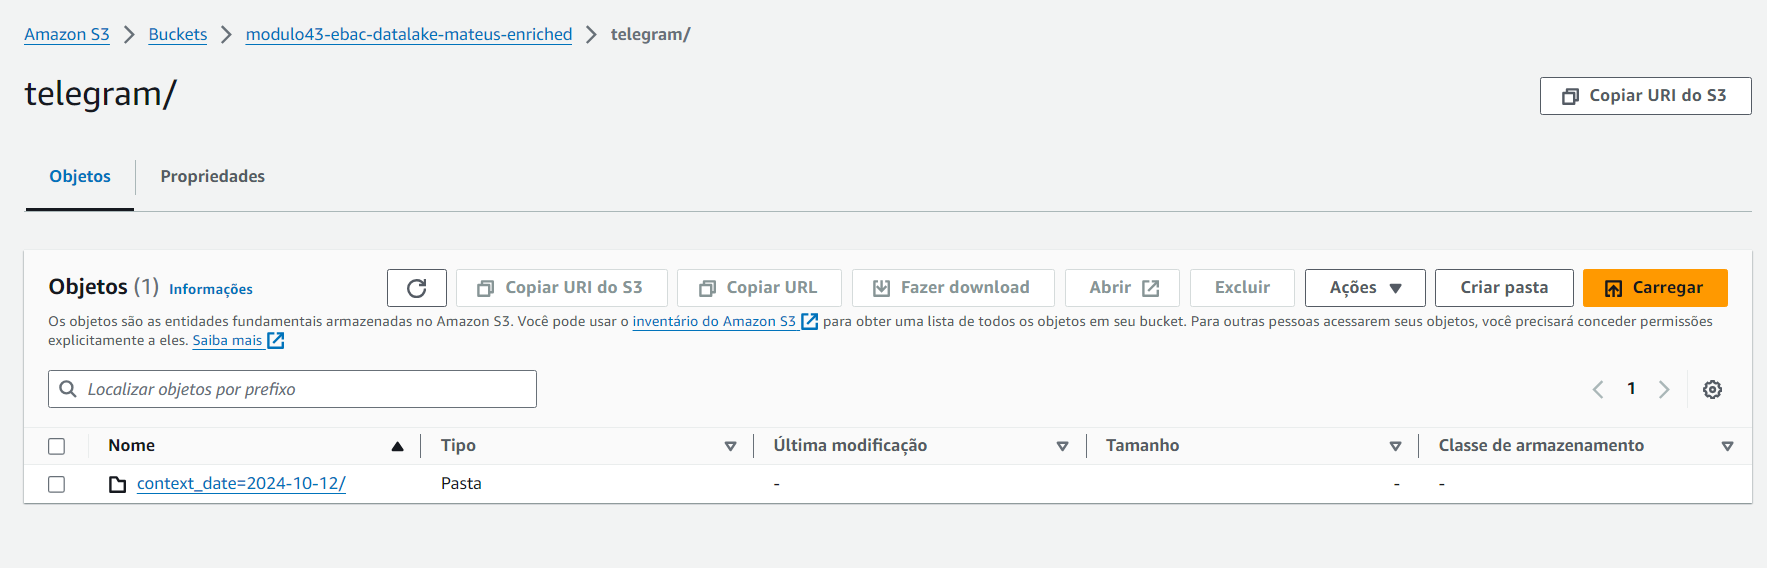

2.3. Crie uma regra no `AWS Event Bridge` para executar a função do `AWS Lambda` todo dia a meia noite no horário de Brasília (GMT-3).

## 3\. Apresentação

Replique as atividades da aula 3.

3.1. Cria a tabela no `AWS Athena` que aponte para os dados armazenados no bucket enriquecido do `AWS S3`.

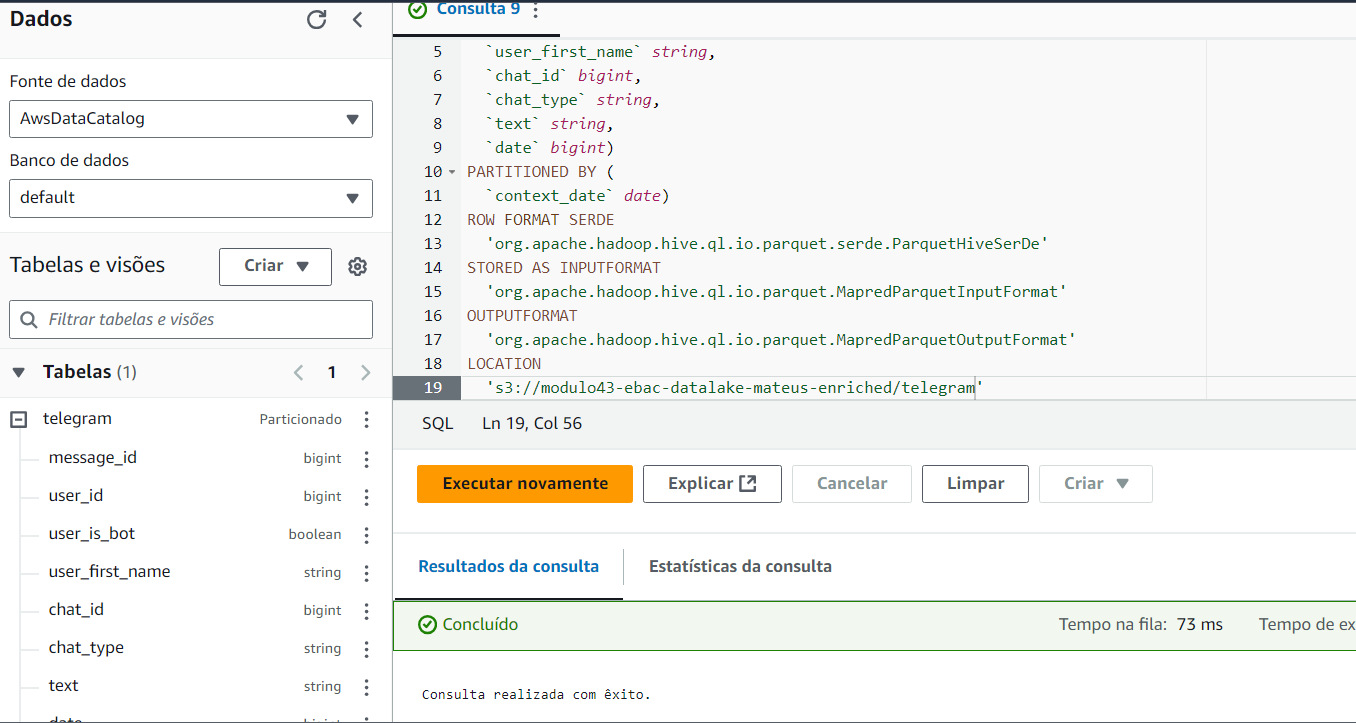

3.2. Execute o comando `MSCK REPAIR TABLE <nome-tabela>` para carregar as partições.

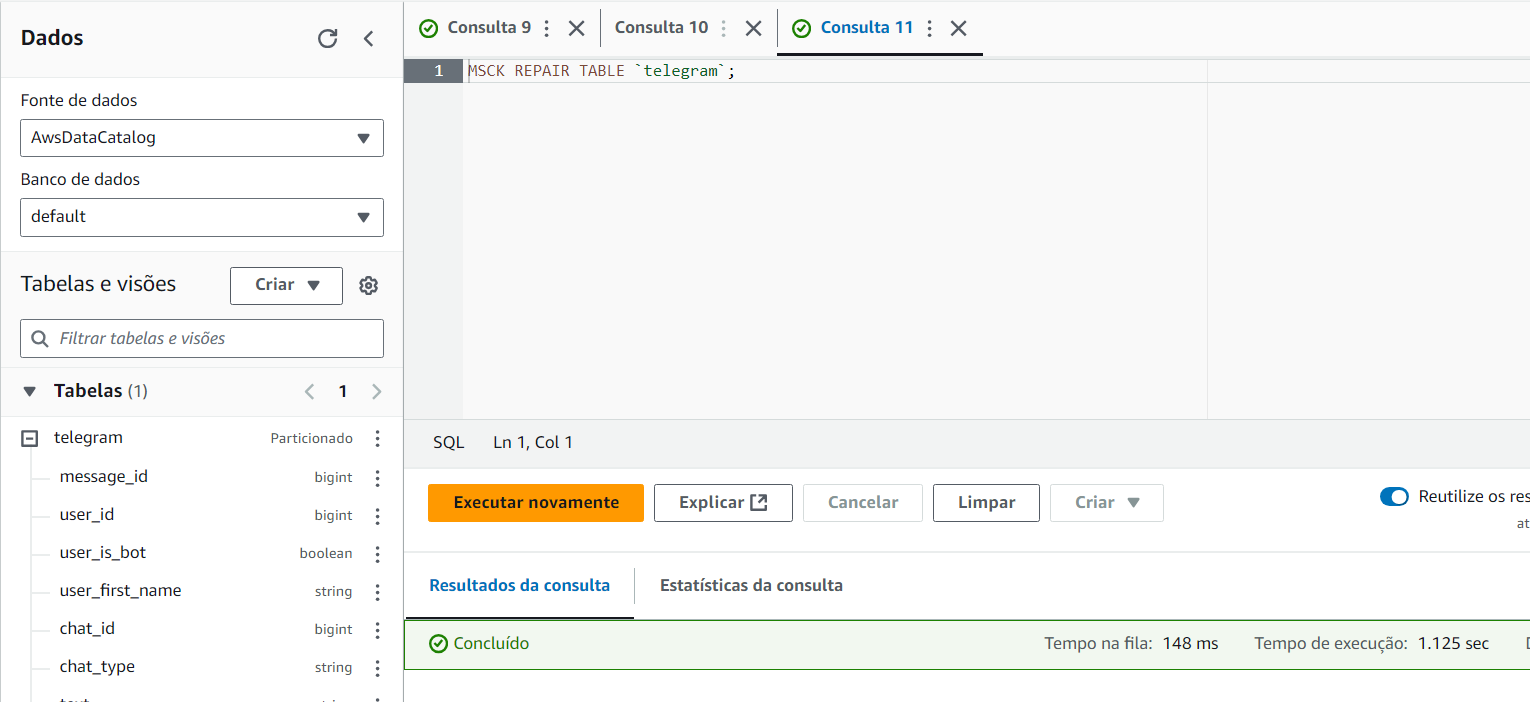

3.3. Execute as consultas SQL para explorar os dados.

```sql
SELECT * FROM `telegram` LIMIT 10;
```

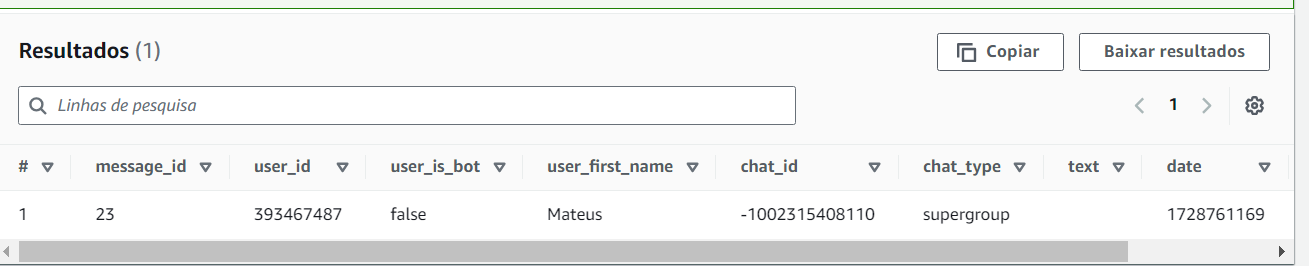

- Quantidade de mensagens por dia.
```sql
SELECT
  context_date,
  count(1) AS "message_amount"
FROM "telegram"
GROUP BY context_date
ORDER BY context_date DESC
```

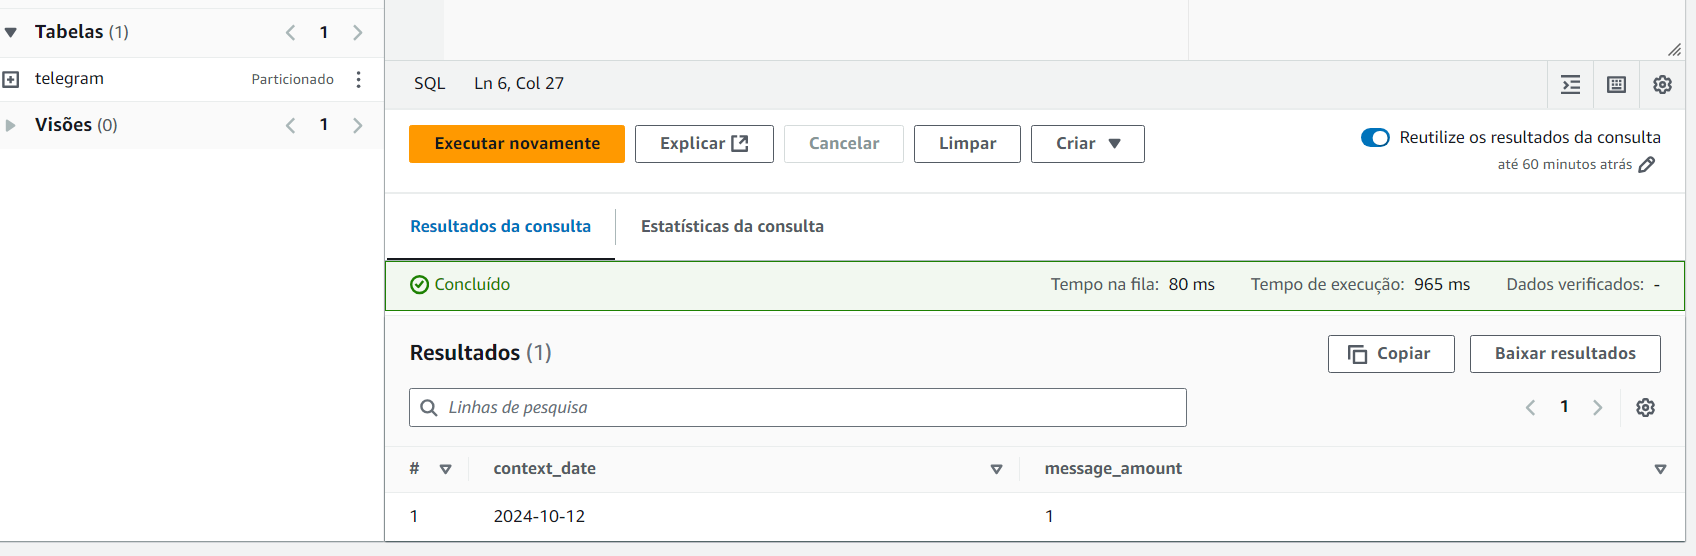

- Quantidade de mensagens por usuário por dia.
```sql
SELECT
  user_id,
  user_first_name,
  context_date,
  count(1) AS "message_amount"
FROM "telegram"
GROUP BY
  user_id,
  user_first_name,
  context_date
ORDER BY context_date DESC
```

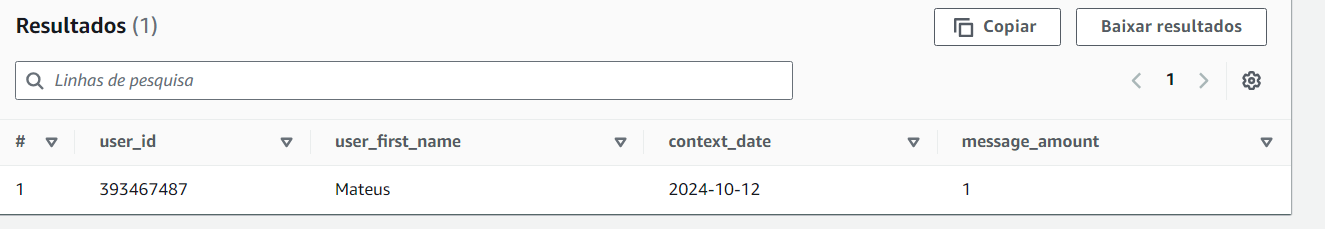

- Média do tamanho das mensagens por usuário por dia.
```sql
SELECT
  user_id,
  user_first_name,
  context_date,
  CAST(AVG(length(text)) AS INT) AS "average_message_length"
FROM "telegram"
GROUP BY
  user_id,
  user_first_name,
  context_date
ORDER BY context_date DESC
```

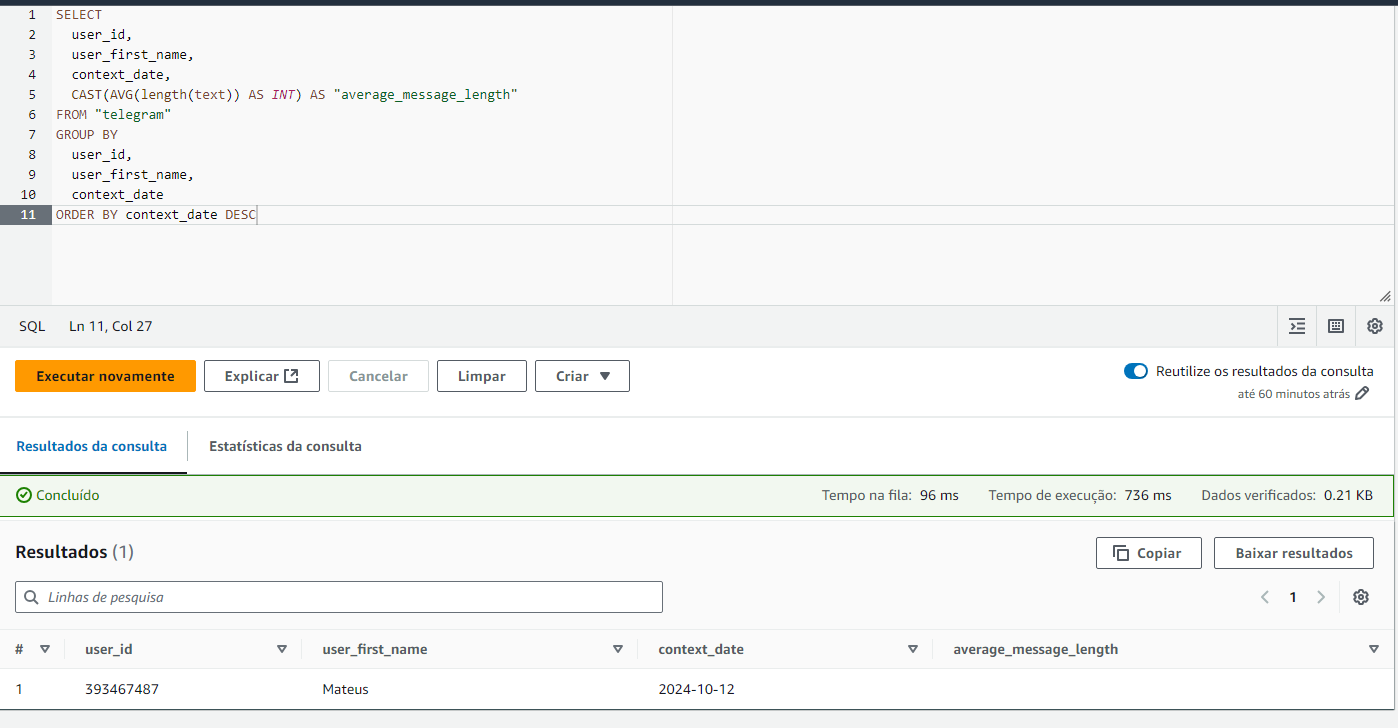

## 4\. Storytelling

Análise Exploratória de Dados em um Pipeline Telegram-AWS: Uma Introdução e sua Importância
Introdução
A análise exploratória de dados (EDA em inglês) é uma etapa fundamental em qualquer projeto de análise de dados, e não é diferente quando se trata de um pipeline de dados que integra o Telegram com a AWS. Este tipo de pipeline, que captura mensagens do Telegram e as processa em serviços AWS como S3, Lambda, Athena, API Gateway e Event Bridge, gera uma grande quantidade de dados que precisam ser compreendidos antes de serem utilizados para tomada de decisões ou desenvolvimento de modelos preditivos.

Neste projeto, criamos o seguinte fluxo de dados

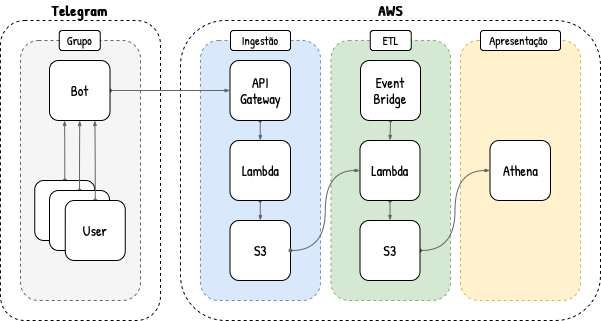

## A Importância da AED em um Pipeline Telegram-AWS
- Qualidade dos dados:

A AED ajuda a identificar e corrigir erros nos dados, como valores faltantes, duplicados ou inconsistentes. Dados de baixa qualidade podem levar a conclusões errôneas e modelos imprecisos.
- Escolha das ferramentas:

Ao entender a natureza dos dados, é possível escolher as ferramentas e técnicas de análise mais adequadas. Por exemplo, se os dados forem altamente dimensionais, técnicas de redução de dimensionalidade podem ser necessárias.

- Desenvolvimento de modelos:

A AED fornece insights sobre as relações entre as variáveis, o que é fundamental para o desenvolvimento de modelos preditivos ou de classificação.

- Tomada de decisões:

A compreensão dos dados permite responder a perguntas de negócio importantes, como quais são os principais drivers de engajamento dos usuários ou quais são as principais áreas de interesse dos clientes.